🔹 1. What is Classification?

Classification is a supervised learning task where the output variable (target) is categorical — e.g., predicting Spam (1) or Not Spam (0).

In [39]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
# Create synthetic binary classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1
)


In [42]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


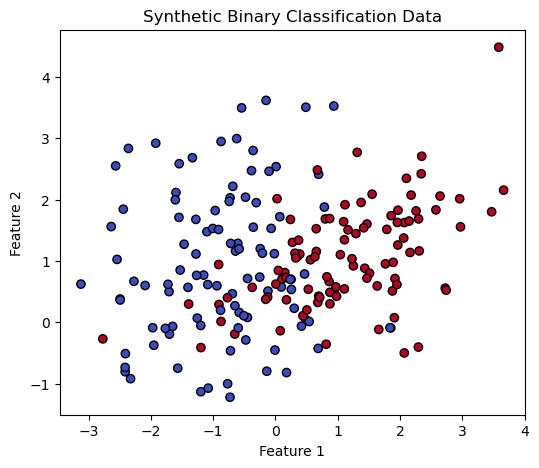

In [43]:

# Visualize data
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Explanation:

We generated a simple dataset with two features so we can visualize how logistic regression works.

🔹 2. Logistic Regression

Although it has “regression” in the name, it’s used for classification.

It predicts the probability that a given input belongs to a particular class.

If P(y=1∣x)>0.5, we classify as 1 (Positive) else 0 (Negative).

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances. Written as a formula:

${\displaystyle {\text{Precision}}={\frac {\text{Relevant retrieved instances}}{{\text{All }}{\textbf {retrieved}}{\text{ instances}}}}}$
-----------------------------------------------------
Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Written as a formula:


${\displaystyle {\text{Recall}}={\frac {\text{Relevant retrieved instances}}{{\text{All }}{\textbf {relevant}}{\text{ instances}}}}}$

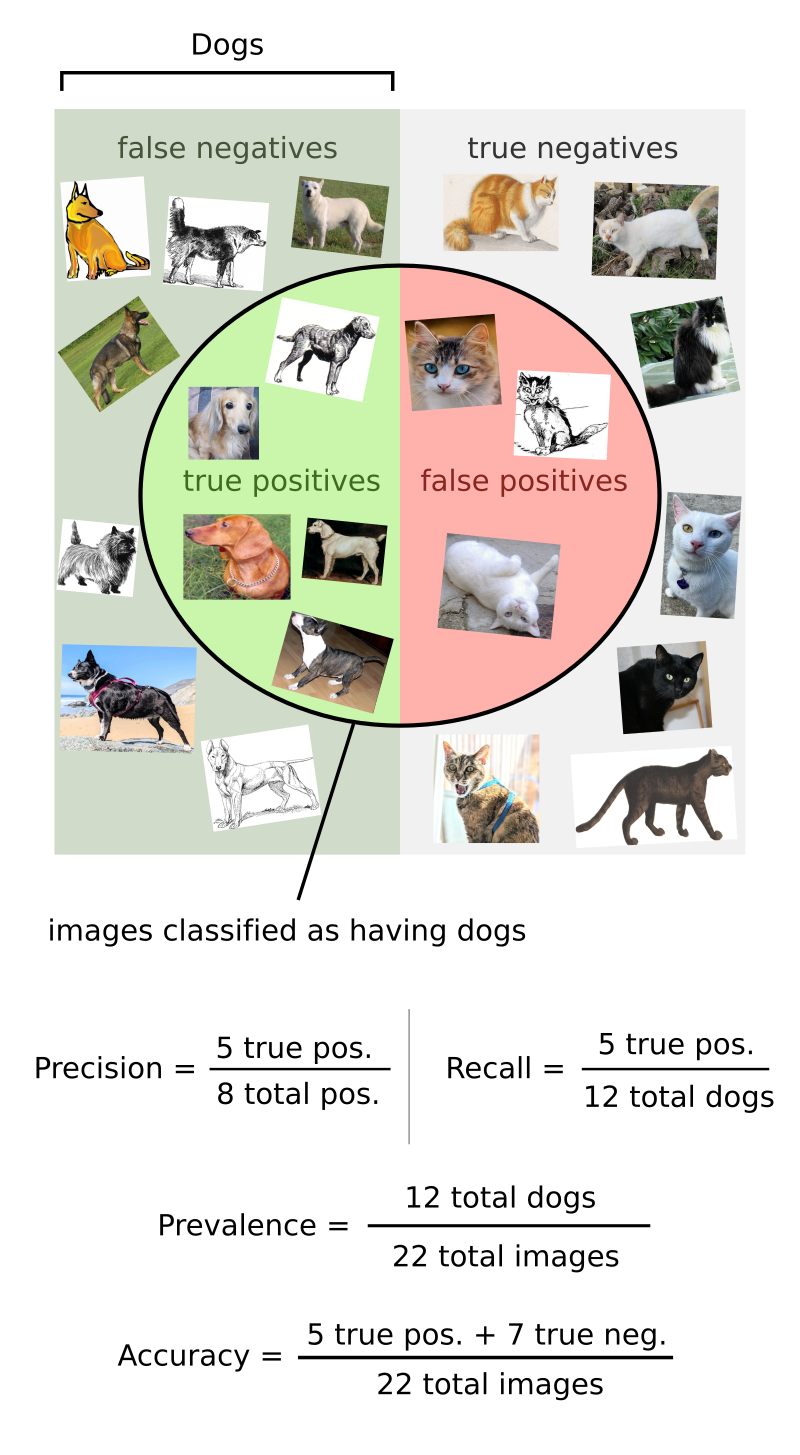

# Train Logistic Regression Model

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.78      0.96      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60



We train the model and check its accuracy and metrics (Precision, Recall, F1-score).

🔹 3. Sigmoid Function

The logistic model uses the sigmoid (logistic) function to convert any real number into a probability between 0 and 1.

# **$σ(z)=1 / (1+e^{−z})$**

If $z= 𝑤_0 + 𝑤_1𝑥_1 + 𝑤_2𝑥_2 + ...$ , then:

**$P(y=1∣x)=σ(z)$**

# Visualize the Sigmoid Function

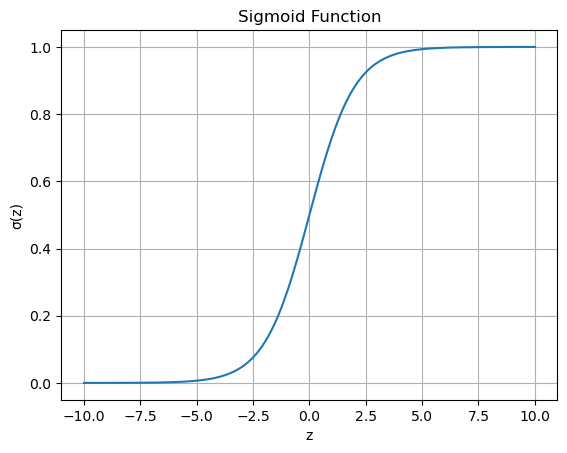

In [45]:
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()


Explanation:

This shows how sigmoid squashes values into [0,1].
When z=0 → σ(z)=0.5 → that’s the decision boundary.

🔹 4. Decision Boundary

The decision boundary is the line (in 2D) or surface (in higher dimensions) that separates different classes.
For example, for threshold = 0.5, the decision boundary is where

P(y=1∣x)=0.5.

# Plot Decision Boundary

In [46]:
# Plot decision boundary
coef = model.coef_[0]
intercept = model.intercept_


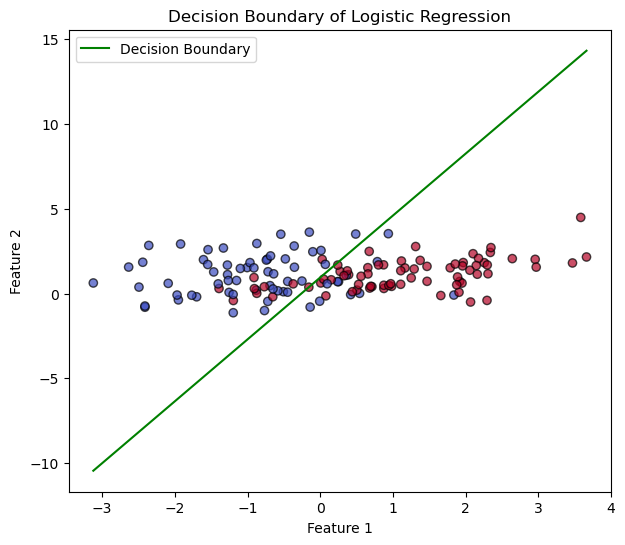

In [47]:
# Equation: w1*x1 + w2*x2 + b = 0 -> x2 = -(b + w1*x1)/w2

x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(intercept + coef[0]*x_values) / coef[1]

plt.figure(figsize=(7,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.legend()
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Explanation:

This shows the line separating two classes.
All points where predicted probability = 0.5 lie on this line.

🔹 5. Predicting Probabilities

Instead of predicting directly 0 or 1, logistic regression predicts the probability of belonging to class 1.
You can adjust the threshold to tune performance.

# Predict Probabilities

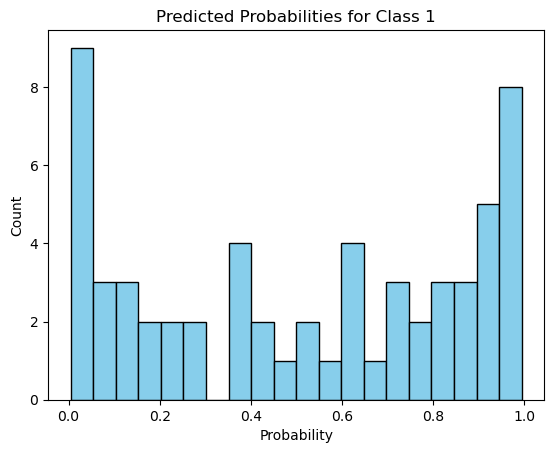

In [48]:
# Predict probabilities instead of labels
y_prob = model.predict_proba(X_test)[:,1]

plt.hist(y_prob, bins=20, color='skyblue', edgecolor='black')
plt.title("Predicted Probabilities for Class 1")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()


Explanation:

We get probability scores from 0 to 1.
The model decides the label using a threshold (default 0.5).

🔹 6. Threshold Tuning

By default, threshold = 0.5.
You can change it to improve metrics like precision, recall, or F1-score.

# Threshold Tuning

In [49]:
# Let's try threshold = 0.7
threshold = 0.7
y_pred_custom = (y_prob >= threshold).astype(int)

print(f"Accuracy (threshold={threshold}):", accuracy_score(y_test, y_pred_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


Accuracy (threshold=0.7): 0.8333333333333334

Confusion Matrix:
 [[30  4]
 [ 6 20]]


Explanation:

Increasing threshold means the model needs to be more confident to predict 1.
This may increase precision but reduce recall.



# Visualizing Effect of Threshold

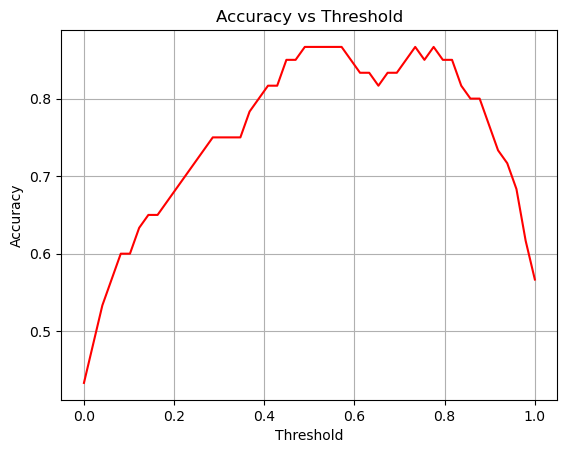

In [50]:
thresholds = np.linspace(0,1,50)
accuracies = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_t))

plt.plot(thresholds, accuracies, color='red')
plt.title("Accuracy vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


# ROC Curve and AUC Score

Explanation:

This shows how accuracy changes with the threshold.
In real-world problems, we often tune this based on metrics like F1-score or ROC-AUC.

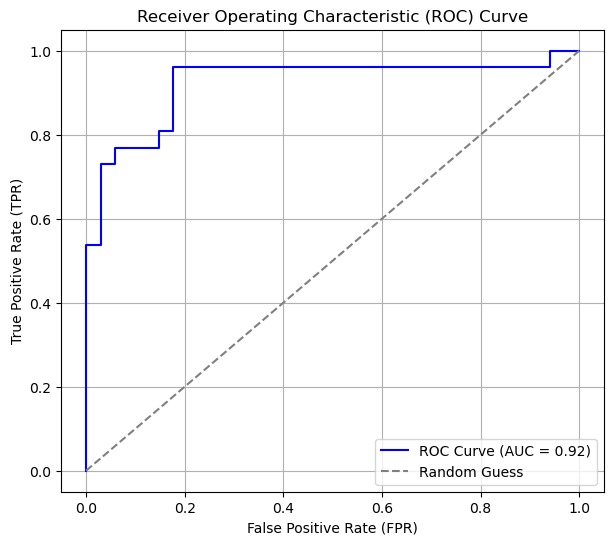

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()


🔹 What is ROC Curve?

The Receiver Operating Characteristic (ROC) curve shows how the True Positive Rate (TPR) changes with the False Positive Rate (FPR) as the threshold varies.

TPR (Sensitivity or Recall) = TP / (TP + FN)

FPR = FP / (FP + TN)

Each point on the ROC curve corresponds to a specific threshold between 0 and 1.

🔹 What is AUC?

AUC = Area Under the ROC Curve

It measures the model’s ability to distinguish between positive and negative classes.

AUC = 1.0 → Perfect classifier

AUC = 0.5 → No discrimination (random guessing)

In [52]:
print("Accuracy (default threshold=0.5):", accuracy_score(y_test, y_pred))
print("AUC Score:", auc_score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy (default threshold=0.5): 0.8666666666666667
AUC Score: 0.923076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.78      0.96      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60

